# Thông Tin
1. MSSV: 20520800
2. Họ và tên: Đặng Anh Tiến
3. Bài tập: Bài tập 5
4. Ngày thực hiện: 26/10/2021

In [ ]:
from google.colab import drive
drive.mount('/gdrive')

Mounted at /gdrive


In [ ]:
DATA_DIR = '/gdrive/MyDrive/CS231.M11/Baitap/Baitap5/images'

In [ ]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt
import imutils
from imutils import opencv2matplotlib
import os
from google.colab.patches import cv2_imshow

In [ ]:
def GraphSeg(path_filename, x, y, w, h):
  img = cv.imread(path_filename)
  img = cv.cvtColor(img, cv.COLOR_BGR2RGB)
  img_copy = img.copy()
  cv.rectangle(img_copy, (x, y), (x + w, y + h), (255, 192, 203), thickness = 2)
  plt.imshow(img_copy)
  plt.show()
  print(img.shape)

  mask = np.zeros(img.shape[:2], np.uint8)
  backgroundModel = np.zeros((1, 65), np.float64)
  foregroundModel = np.zeros((1, 65), np.float64)
  rectangle = (x, y, w, h)
  cv.grabCut(img, mask, rectangle,
              backgroundModel, foregroundModel,
              5, cv.GC_INIT_WITH_RECT)

  mask2 = np.where((mask == 2) | (mask == 0), 0, 1).astype('uint8')
  res = img * mask2[:, :, np.newaxis]
  plt.imshow(res)
  plt.show()
  res = cv.cvtColor(res, cv.COLOR_BGR2RGB)


In [ ]:
img1_path = 'Lionel-Messi.jpg'
img2_path = 'dogcat.jpg'
img3_path = 'camourflage_00061.jpg'

# Yêu Cầu 1
Ảnh Lionel-Messi.jpg, dogcat.jpg, camourflage_00012.jpg

## Lionel-Messi.jpg

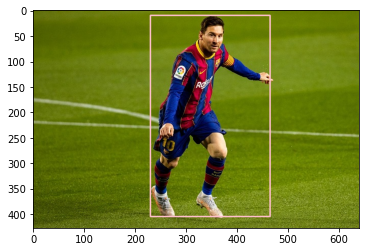

(427, 640, 3)


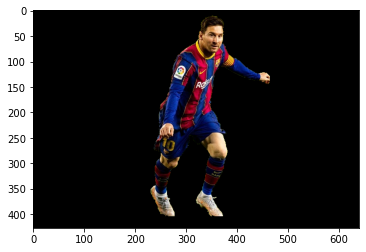

In [ ]:
GraphSeg(os.path.join(DATA_DIR, img1_path), 230, 10, 235, 394)

## dogcat.jpg

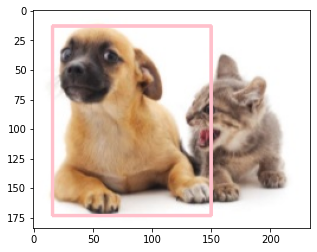

(184, 234, 3)


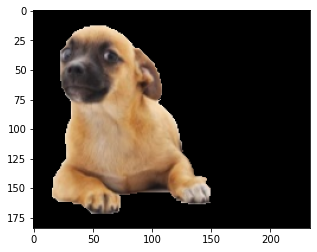

In [ ]:
GraphSeg(os.path.join(DATA_DIR, img2_path), 16, 13, 134, 160)

## camourflage_00061.jpg

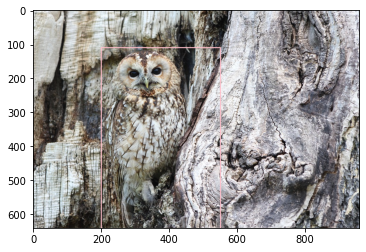

(640, 960, 3)


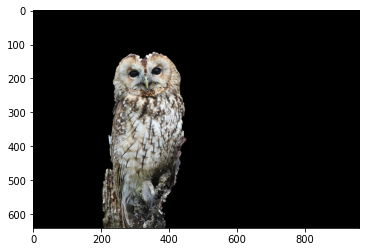

In [ ]:
GraphSeg(os.path.join(DATA_DIR, img3_path), 200, 110, 350, 590)